# Data Science Challenge

In [ ]:
# To install packages that are not installed by default, uncomment the last two lines 
# of this cell and replace <package list> with a list of necessary packages.
# This will ensure the notebook has all the dependencies and works everywhere.

#import sys
#!{sys.executable} -m pip install <package list>

In [3]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", 101)

## Data Description

Column | Description
:---|:---
`id` | The unique ID assigned to every hotel.
`region` | The region in which the hotel is located..
`latitude` | The latitude of the hotel.
`longitude` | The longitude of the hotel.
`accommodation_type` | The type of accommodation offered by the hotel. For example: Private room, Entire house/apt, etc.
`cost` | The cost of booking the hotel for one night. (in \$\$)
`minimum_nights` | The minimum number of nights stay required.
`number_of_reviews` | The number of reviews accumulated by the hotel.
`reviews_per_month` | The average number of reviews received by the hotel per month.
`owner_id` | The unique ID assigned to every owner. An owner can own multiple hotels.
`owned_hotels` | The number of hotels owned by the owner.
`yearly_availability` | It indicates if the hotel accepts bookings around the year. Values are 0 (not available for 365 days in a year) and 1 (available for 365 days in a year).

## Data Wrangling & Visualization

In [141]:
# Dataset is already loaded below
data = pd.read_csv("train.csv")

In [142]:
data.head()

,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability
0,13232,Manhattan,40.71854,-74.00439,Entire home/apt,170,5,7,0.56,929983,1,0
1,246,Brooklyn,40.64446,-73.95030,Entire home/apt,65,3,238,2.30,281764,1,0
2,19091,Queens,40.78573,-73.81062,Private room,85,1,0,NaN,19923341,1,1
3,34305,Manhattan,40.73863,-73.98002,Private room,210,30,0,NaN,200380610,65,1
4,444,Manhattan,40.82426,-73.94630,Shared room,75,3,38,0.42,745069,3,1


In [5]:
#Explore columns
data.columns

Index(['id', 'region', 'latitude', 'longitude', 'accommodation_type', 'cost',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'owner_id',
       'owned_hotels', 'yearly_availability'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2870 entries, 0 to 2869
Data columns (total 12 columns):
id                     2870 non-null int64
region                 2870 non-null object
latitude               2870 non-null float64
longitude              2870 non-null float64
accommodation_type     2870 non-null object
cost                   2870 non-null int64
minimum_nights         2870 non-null int64
number_of_reviews      2870 non-null int64
reviews_per_month      2194 non-null float64
owner_id               2870 non-null int64
owned_hotels           2870 non-null int64
yearly_availability    2870 non-null int64
dtypes: float64(3), int64(7), object(2)
memory usage: 269.2+ KB


In [7]:
#checking for null values
data.isna().sum()

id                       0
region                   0
latitude                 0
longitude                0
accommodation_type       0
cost                     0
minimum_nights           0
number_of_reviews        0
reviews_per_month      676
owner_id                 0
owned_hotels             0
yearly_availability      0
dtype: int64

We seem to have 676 null values on what seems to be an important feature to predict yearly availability - reviews per month. 

In [9]:
data['reviews_per_month'].values

array([0.56, 2.3 ,  nan, ..., 0.67,  nan, 0.33])

We impute the missing values with zero since we cannot afford removing as many rows and zero serves as a close approximation to actual scenario.

In [143]:
data['reviews_per_month'].fillna(0, inplace=True)

In [144]:
#checking for null values
data.isna().sum()

id                     0
region                 0
latitude               0
longitude              0
accommodation_type     0
cost                   0
minimum_nights         0
number_of_reviews      0
reviews_per_month      0
owner_id               0
owned_hotels           0
yearly_availability    0
dtype: int64

In [14]:
#Description
data.describe()

,id,latitude,longitude,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability
count,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2.870000e+03,2870.000000,2870.000000
mean,26760.657143,40.731224,-73.950158,195.943206,11.530314,16.315331,0.884864,7.202195e+07,8.411498,0.498606
std,14140.930062,0.054942,0.049745,406.184714,37.972339,32.481722,1.282500,8.076516e+07,27.105522,0.500085
min,0.000000,40.507080,-74.242850,10.000000,1.000000,0.000000,0.000000,2.787000e+03,1.000000,0.000000
25%,15931.750000,40.692462,-73.984003,75.000000,1.000000,1.000000,0.030000,7.388002e+06,1.000000,0.000000
50%,28946.500000,40.728250,-73.956720,120.000000,3.000000,4.000000,0.380000,3.352708e+07,1.000000,0.000000
75%,38478.500000,40.762658,-73.934202,200.000000,6.000000,16.000000,1.130000,1.207625e+08,3.000000,1.000000
max,48893.000000,40.898730,-73.721730,9999.000000,999.000000,395.000000,10.370000,2.738123e+08,327.000000,1.000000


In [15]:
data.dtypes

id                       int64
region                  object
latitude               float64
longitude              float64
accommodation_type      object
cost                     int64
minimum_nights           int64
number_of_reviews        int64
reviews_per_month      float64
owner_id                 int64
owned_hotels             int64
yearly_availability      int64
dtype: object

**Univariate Analyses**

In [16]:
data['yearly_availability'].value_counts()

0    1439
1    1431
Name: yearly_availability, dtype: int64

This seems to be a balanced dataset. Hence we can use accuracy to measure our model performance.

In [22]:
import warnings
warnings.filterwarnings('ignore')

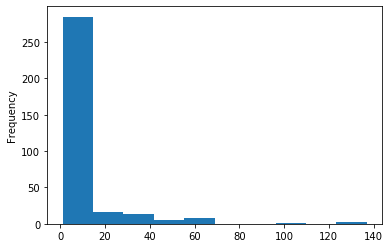

In [23]:
data['cost'].value_counts().plot('hist');

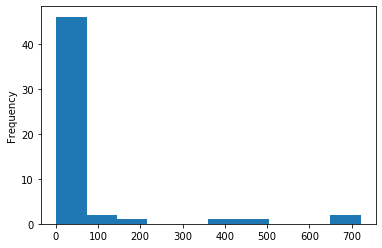

In [24]:
data['minimum_nights'].value_counts().plot('hist');

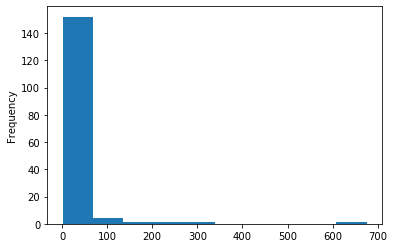

In [25]:
data['number_of_reviews'].value_counts().plot('hist');

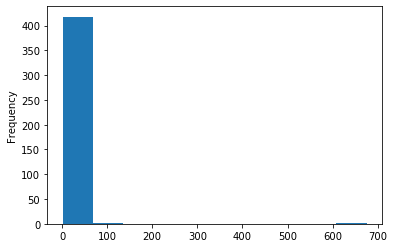

In [26]:
data['reviews_per_month'].value_counts().plot('hist');

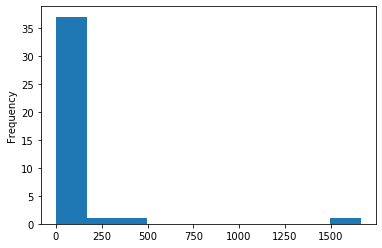

In [35]:
data['owned_hotels'].value_counts().plot('hist');

#### Categorical Features

In [27]:
data.head()

,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability
0,13232,Manhattan,40.71854,-74.00439,Entire home/apt,170,5,7,0.56,929983,1,0
1,246,Brooklyn,40.64446,-73.95030,Entire home/apt,65,3,238,2.30,281764,1,0
2,19091,Queens,40.78573,-73.81062,Private room,85,1,0,0.00,19923341,1,1
3,34305,Manhattan,40.73863,-73.98002,Private room,210,30,0,0.00,200380610,65,1
4,444,Manhattan,40.82426,-73.94630,Shared room,75,3,38,0.42,745069,3,1


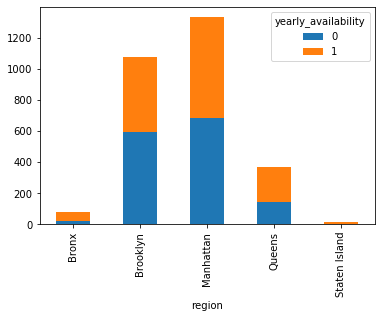

In [33]:
data.groupby(['region', 'yearly_availability'])['yearly_availability'].count().unstack('yearly_availability').plot(kind='bar', stacked=True)

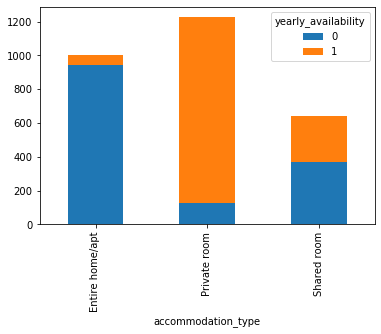

In [34]:
data.groupby(['accommodation_type', 'yearly_availability'])['yearly_availability'].count().unstack('yearly_availability').plot(kind='bar', stacked=True)

## Outliers

In [36]:
data.dtypes

id                       int64
region                  object
latitude               float64
longitude              float64
accommodation_type      object
cost                     int64
minimum_nights           int64
number_of_reviews        int64
reviews_per_month      float64
owner_id                 int64
owned_hotels             int64
yearly_availability      int64
dtype: object

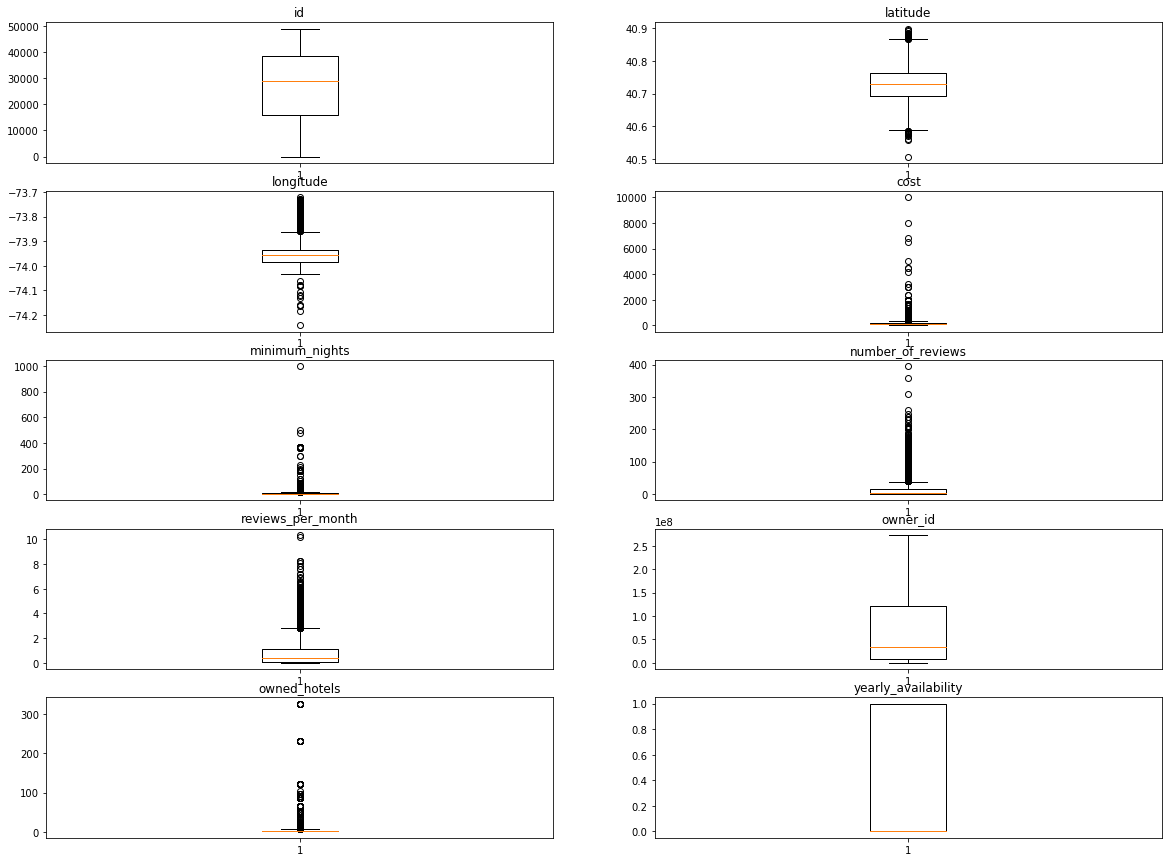

In [45]:
#filtering numerical columns
num_col = list(data.select_dtypes(np.number).columns)

plt.figure(figsize=(20,15))
for i, col in enumerate(num_col):
    ax = plt.subplot(5,2, i+1)
    plt.boxplot(data[col])
    plt.title(col)

**Observations:**

We observe a lot of outliers for cost, minimum nights, number of  reviews, reviews per month and owned hotels. From our Univariate plotting, we can see that they seem to follow a pareto distribution. 
    

In [145]:
data1 = data #checkpoint1

## Feature Engineering

In [47]:
data.dtypes

id                       int64
region                  object
latitude               float64
longitude              float64
accommodation_type      object
cost                     int64
minimum_nights           int64
number_of_reviews        int64
reviews_per_month      float64
owner_id                 int64
owned_hotels             int64
yearly_availability      int64
dtype: object

Based on the distribution we observed during plotting and to minimize the impact of Outliers, we apply logarithmic transformation to the columns.

In [146]:
#log transforming the columns to minimize the impact of outliers
col_out = ['cost', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'owned_hotels']

for col in col_out:
    data[col] = np.log(data[col] + 1) #adding 1 to avoid getting log 0

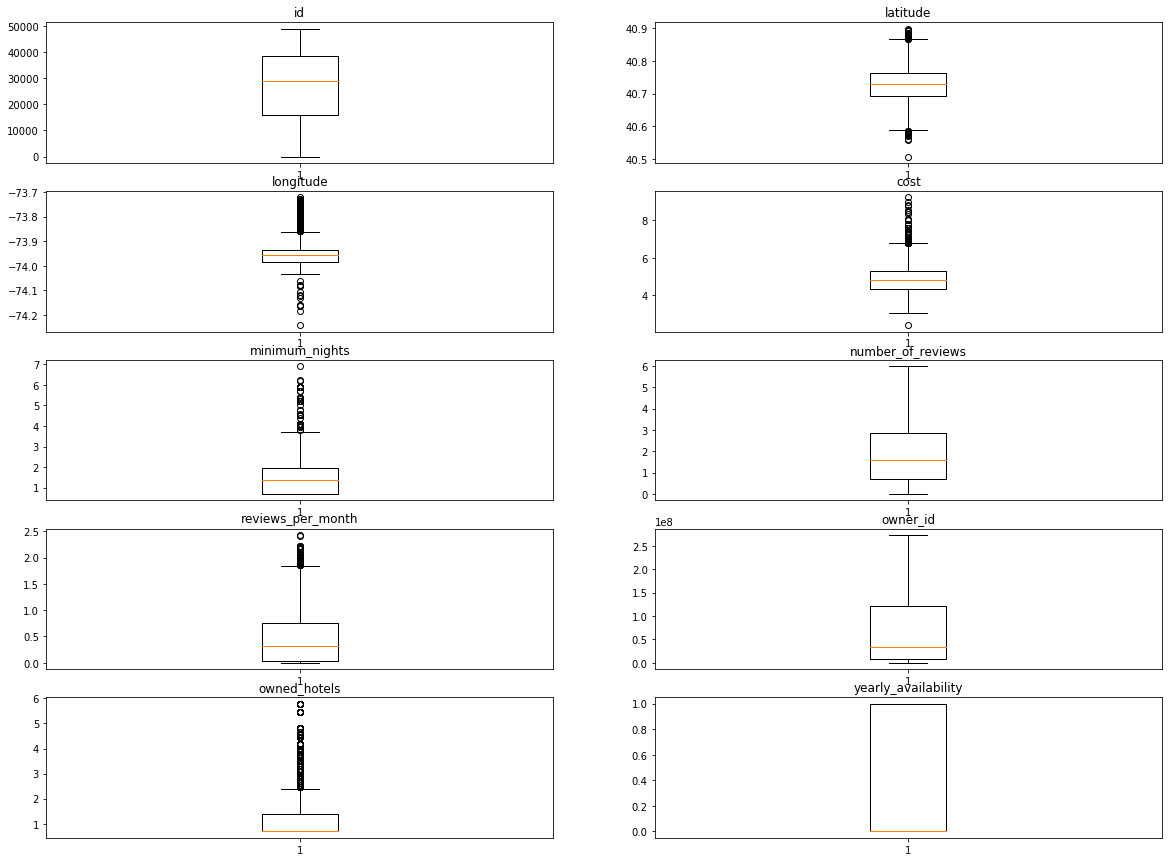

In [147]:
plt.figure(figsize=(20,15))
for i, col in enumerate(num_col):
    ax = plt.subplot(5,2, i+1)
    plt.boxplot(data[col])
    plt.title(col)

In [148]:
#Dropping columns that don't affect the target variable
data.drop(['id', 'latitude', 'longitude', 'owner_id'], axis=1, inplace=True)

**Visualizing the correlation between Features**

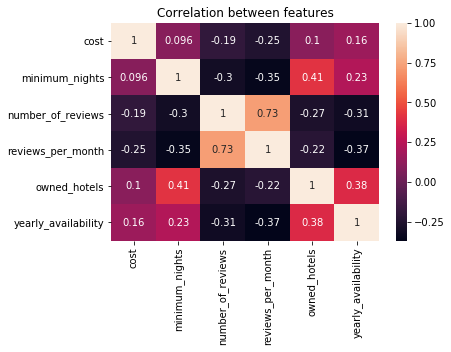

In [149]:
import seaborn as sns
sns.heatmap(data.corr(), annot=True)
plt.title('Correlation between features');

**Observations:**

We can see high correlation between number of reviews and reviews per month, which is expected. In order to avoid multicollinearity, we can use one of the two features.

In [69]:
df_corr = data.corr()
df_corr.iloc[5:6, :-1]

,cost,minimum_nights,number_of_reviews,reviews_per_month,owned_hotels
yearly_availability,0.145625,0.181542,-0.332121,-0.391529,0.41346


Since reviews per month has a higher correlation with the target variable, let's drop number of reviews.

In [150]:
data.drop('number_of_reviews', axis=1, inplace=True)

In [151]:
data2 = data #checkpoint2

**Converting Categorical variables to numerical**

In [74]:
data.dtypes

region                  object
accommodation_type      object
cost                   float64
minimum_nights         float64
reviews_per_month      float64
owned_hotels           float64
yearly_availability      int64
dtype: object

In [152]:
data = pd.get_dummies(data, columns=['region', 'accommodation_type'])

In [232]:
data.head()

,cost,minimum_nights,reviews_per_month,owned_hotels,yearly_availability,region_Bronx,region_Brooklyn,region_Manhattan,region_Queens,region_Staten Island,accommodation_type_Entire home/apt,accommodation_type_Private room,accommodation_type_Shared room
0,5.141664,1.791759,0.444686,0.693147,0,0,0,1,0,0,1,0,0
1,4.189655,1.386294,1.193922,0.693147,0,0,1,0,0,0,1,0,0
2,4.454347,0.693147,0.000000,0.693147,1,0,0,0,1,0,0,1,0
3,5.351858,3.433987,0.000000,4.189655,1,0,0,1,0,0,0,1,0
4,4.330733,1.386294,0.350657,1.386294,1,0,0,1,0,0,0,0,1


We have one column created for each of the categories in region and acommodation type. Since one of the columns can be derived from the others, in order to avoid the dummy variable trap, we'll drop a column from region and accomodation type each of our choice.

In [233]:
data = data.drop(['region_Bronx', 'accommodation_type_Entire home/apt'], axis=1)

In [234]:
data.shape

(2870, 11)

## Visualization, Modeling, Machine Learning

Build a model that categorizes hotels on the basis of their yearly availability.  Identify how different features influence the decision. Please explain the findings effectively to technical and non-technical audiences using comments and visualizations, if appropriate.
- **Build an optimized model that effectively solves the business problem.**
- **The model will be evaluated on the basis of Accuracy.**
- **Read the test.csv file and prepare features for testing.**

In [235]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [236]:
y = data['yearly_availability']
X = data.drop('yearly_availability', axis=1)

#keeping 20% of the data for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [237]:
print(X_train.shape)
print(X_test.shape)

(2296, 10)
(574, 10)


#### Applying Classification Models

In [238]:
#Importing all the models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

In [239]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
lr_acc = accuracy_score(y_test, y_pred)
print("Accuracy with Logistic Regression: ", lr_acc)

Accuracy with Logistic Regression:  0.8989547038327527


In [240]:
df_metric = pd.DataFrame(columns=['Accuracy'], index=['Logistic Regression', 'SVM', 'KNN', 'Random Forest'])

In [250]:
df_metric.loc['Logistic Regression'] = lr_acc

In [242]:
knn_acc = {}
for i in range(1,30): 
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    knn_acc[i] = accuracy_score(y_test, y_pred)

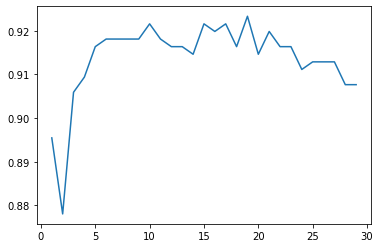

In [118]:
xi = list(knn_acc.keys())
yi = list(knn_acc.values())   
plt.plot(xi, yi);

In [243]:
print(f'Maximum accuracy of {max(knn_acc.values())} occurs at {max(knn_acc, key=knn_acc.get)}NN')

Maximum accuracy of 0.9337979094076655 occurs at 7NN


In [244]:
df_metric.loc['KNN'] = str(max(knn_acc.values())) + ',' + str(max(knn_acc, key=knn_acc.get))

**SVM**

In [245]:
svc = svm.SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
svc_acc = accuracy_score(y_test, y_pred)
print("Accuracy with Support Vector Machines: ", svc_acc)

Accuracy with Support Vector Machines:  0.9181184668989547


In [246]:
df_metric.loc['SVM'] = svc_acc

**Random Forest**

In [247]:
rf = RandomForestClassifier(random_state=20)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred)
print("Accuracy with Random Forest: ", rf_acc)

Accuracy with Random Forest:  0.9163763066202091


In [248]:
df_metric.loc['Random Forest'] = rf_acc

In [251]:
#Performances of various Classifiers
df_metric

,Accuracy
Logistic Regression,0.898955
SVM,0.918118
KNN,"0.9337979094076655,7"
Random Forest,0.916376


Our best performing model is KNN with an Accuracy of 93.37% when K=7.

**Applying the same transformations to Test Data**

In [217]:
#Loading Test data
test_data=pd.read_csv('test.csv')
test_data.head()

,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels
0,19215,Brooklyn,40.70912,-73.94513,Shared room,135,2,22,0.66,4360212,1
1,36301,Brooklyn,40.57646,-73.96641,Entire home/apt,69,2,8,0.90,181356989,2
2,40566,Manhattan,40.76616,-73.98228,Private room,225,30,0,NaN,13773574,12
3,33694,Manhattan,40.77668,-73.94587,Shared room,125,30,9,0.82,6788748,1
4,28873,Manhattan,40.80279,-73.94450,Entire home/apt,43,1,13,0.72,105061915,2


In [218]:
#checking for null values
test_data.isna().sum()

id                      0
region                  0
latitude                0
longitude               0
accommodation_type      0
cost                    0
minimum_nights          0
number_of_reviews       0
reviews_per_month     173
owner_id                0
owned_hotels            0
dtype: int64

In [219]:
test_data['reviews_per_month'].fillna(0, inplace=True)

In [221]:
#log transforming the columns to minimize the impact of outliers
col_out = ['cost', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'owned_hotels']

for col in col_out:
    test_data[col] = np.log(test_data[col] + 1) #adding 1 to avoid getting log 0

In [223]:
#Dropping columns that don't affect the target variable
test_data.drop(['id', 'latitude', 'longitude', 'owner_id'], axis=1, inplace=True)

In [225]:
#Dropping columns that are highly correlated between each other to avoid multicollinearity
test_data.drop('number_of_reviews', axis=1, inplace=True)

In [227]:
#One Hot encoding categorical columns
test_data = pd.get_dummies(test_data, columns=['region', 'accommodation_type'])

In [229]:
#Dropping one column from each set to avoid dummy variable trap
test_data = test_data.drop(['region_Bronx', 'accommodation_type_Entire home/apt'], axis=1)



**Highlight the most important features of the model for management.**

> #### Task:
- **Visualize the top 20 features and their feature importance.**


In [164]:
import numpy as np

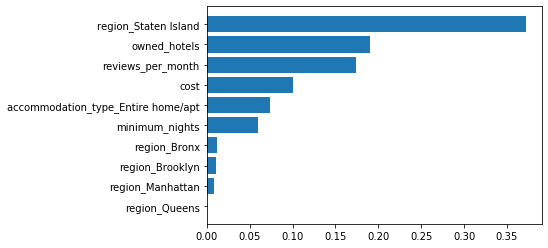

In [172]:
#Visualizing the top features with Random Forest

imp = rf.feature_importances_
s_feat = np.argsort(imp)
xi = range(len(s_feat))
yi = imp[s_feat]
plt.barh(xi, yi)
plt.yticks(xi, [X_train.columns[i] for i in s_feat]);

Ignoring the encoded categories, we can see that owned hotels, reviews per month and the cost are the top three features.

> #### Task:
- **Submit the predictions on the test dataset using your optimized model** <br/>
    For each record in the test set (`test.csv`), predict the value of the `yearly_availability` variable. Submit a CSV file with a header row and one row per test entry.

The file (`submissions.csv`) should have exactly 2 columns:
   - **id**
   - **yearly_availability**

**Using our best performing model to predict** 

In [255]:
knn_19 = KNeighborsClassifier(n_neighbors=19)
knn_19.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                     weights='uniform')

In [256]:
y_pred1 = knn_19.predict(test_data)

In [257]:
test1 = pd.read_csv('test.csv')

In [262]:
test_data['id'] = test1['id']

In [270]:
test_data['yearly_availability'] = y_pred1
submission_df = test_data[['id', 'yearly_availability']]

In [271]:
#Submission
submission_df.to_csv('submissions.csv',index=False)

---